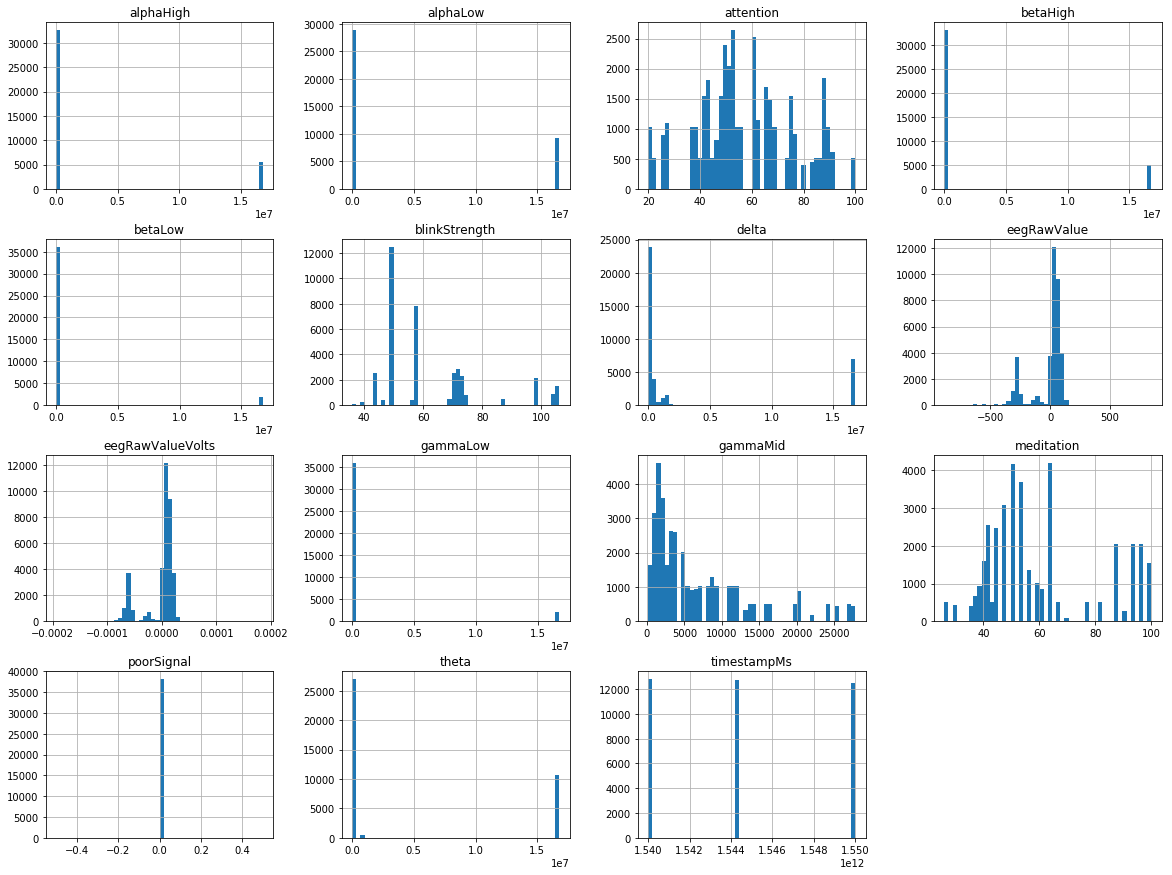

In [5]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

updf1 = pd.read_csv("../data_files/up/upFor5(1).csv")
updf2 = pd.read_csv("../data_files/up/upFor5(2).csv")
updf3 = pd.read_csv("../data_files/up/upFor5(3).csv")
updf4 = pd.read_csv("../data_files/up/upFor5(4).csv")
updf5 = pd.read_csv("../data_files/up/upFor5(5).csv")
downdf1 = pd.read_csv("../data_files/down/downFor5(1).csv")
downdf2 = pd.read_csv("../data_files/down/downFor5(2).csv")
downdf3 = pd.read_csv("../data_files/down/downFor5(3).csv")
downdf4 = pd.read_csv("../data_files/down/downFor5(4).csv")
downdf5 = pd.read_csv("../data_files/down/downFor5(5).csv")

rest = pd.read_csv("../data_files/relax/Relax25secs.csv")

ups = pd.concat([updf1, updf2, updf3, updf4, updf5])
downs = pd.concat([downdf1, downdf2, downdf3, downdf4, downdf5])
frames = [downdf1, downdf2, downdf3, downdf4, downdf5, updf1, updf2, updf3, updf4, updf5, rest]
df = pd.concat(frames)

df.head()

%matplotlib inline 
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15)) 
plt.show()

In [23]:
df.describe()

,timestampMs,poorSignal,eegRawValue,eegRawValueVolts,attention,meditation,blinkStrength,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid
count,3.807700e+04,38077.0,38076.000000,38077.000000,38077.000000,38077.000000,38077.000000,3.807700e+04,3.807700e+04,3.807700e+04,3.807700e+04,3.807700e+04,3.807700e+04,3.807700e+04,38077.000000
mean,1.544746e+12,0.0,-12.793571,-0.000003,57.258555,59.881293,62.414528,3.254233e+06,4.751467e+06,4.093191e+06,2.420183e+06,8.573161e+05,2.225047e+06,9.324049e+05,6753.301704
std,4.084418e+09,0.0,145.643588,0.000032,18.755803,19.874893,17.649831,6.367380e+06,7.496815e+06,7.182593e+06,5.866697e+06,3.664307e+06,5.669274e+06,3.818726e+06,6690.284618
min,1.540000e+12,0.0,-883.000000,-0.000194,20.000000,26.000000,36.000000,5.853000e+03,5.586000e+03,1.098000e+03,1.160000e+03,9.910000e+02,8.660000e+02,4.270000e+02,177.000000
25%,1.540000e+12,0.0,6.000000,0.000001,44.000000,44.000000,49.000000,2.842000e+04,1.828900e+04,8.049000e+03,1.144400e+04,7.176000e+03,6.066000e+03,3.765000e+03,1878.000000
50%,1.544360e+12,0.0,37.000000,0.000008,53.000000,54.000000,57.000000,1.235850e+05,6.626700e+04,1.605600e+04,1.815000e+04,1.282100e+04,1.364300e+04,8.314000e+03,3944.000000
75%,1.550000e+12,0.0,65.000000,0.000014,69.000000,67.000000,72.000000,1.066286e+06,1.674928e+07,1.509290e+05,3.073800e+04,1.780300e+04,2.359200e+04,1.536800e+04,9309.000000
max,1.550000e+12,0.0,845.000000,0.000186,100.000000,100.000000,106.000000,1.677484e+07,1.677700e+07,1.677530e+07,1.677675e+07,1.676259e+07,1.677305e+07,1.674820e+07,27793.000000


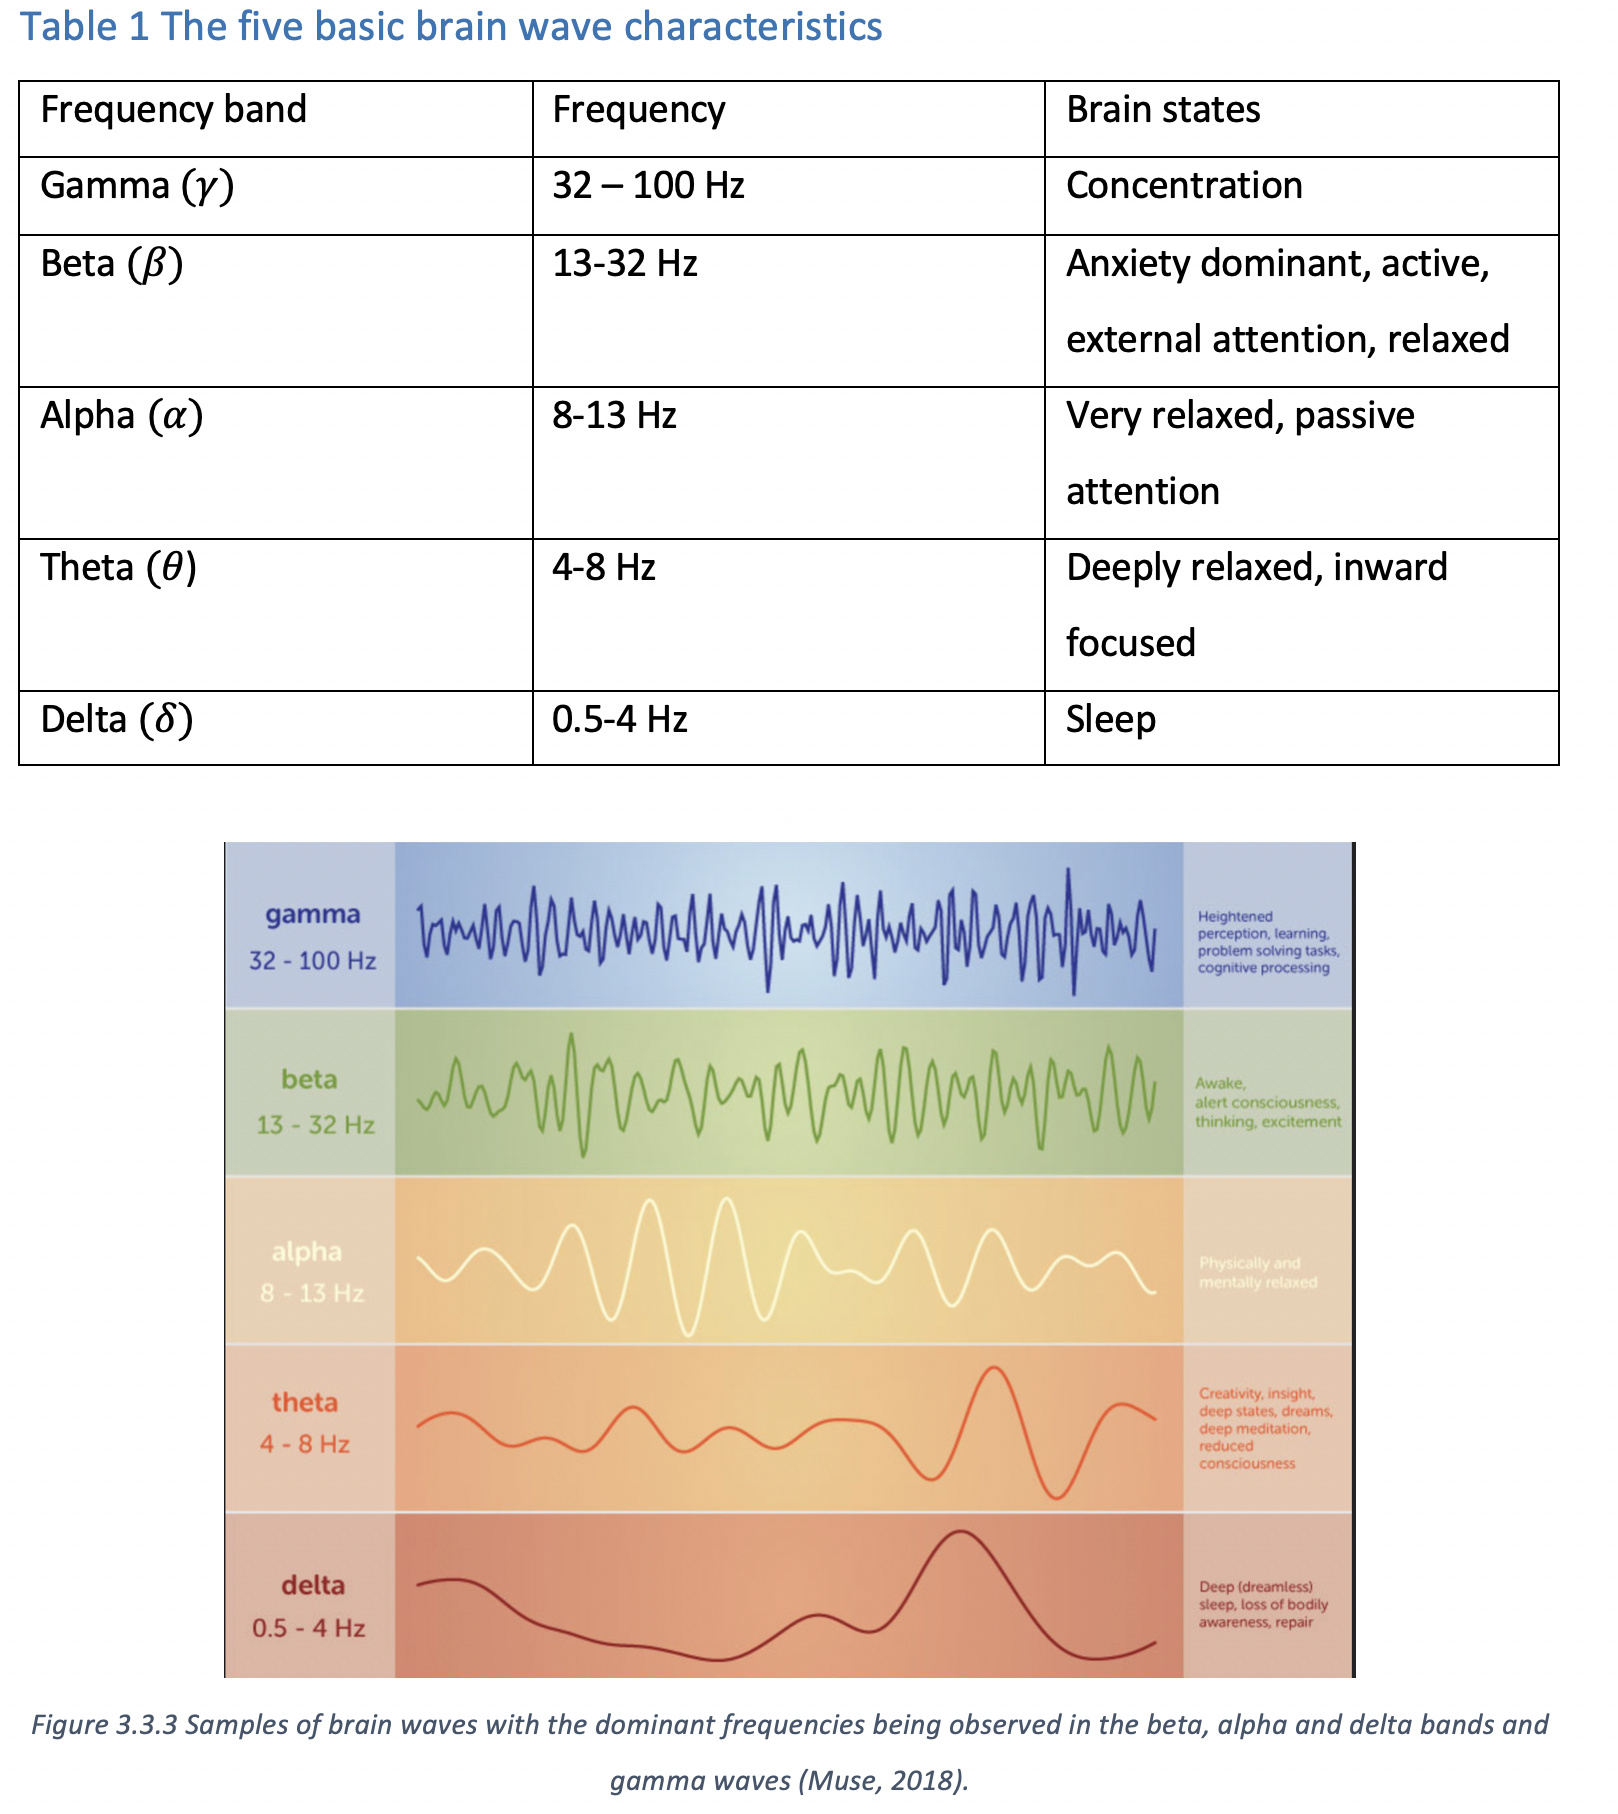

## Mean comparison of waves while resting and thinking up or down

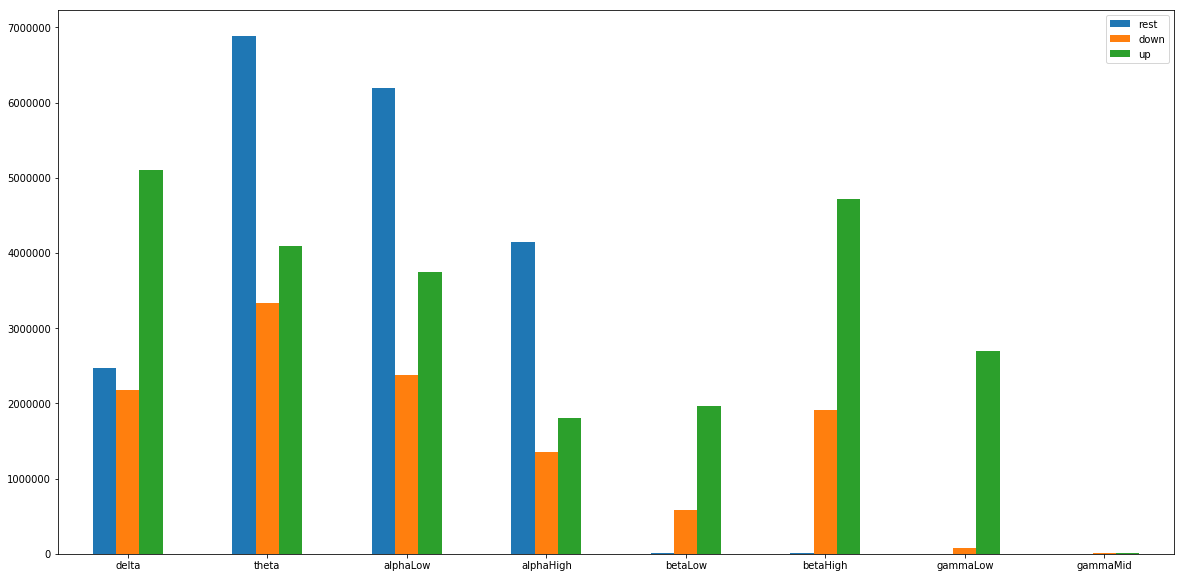

In [6]:
r = [rest.delta.mean(), rest.theta.mean(), rest.alphaLow.mean(), 
     rest.alphaHigh.mean(), rest.betaLow.mean(), rest.betaHigh.mean(), 
     rest.gammaLow.mean(), rest.gammaMid.mean()]

d = [ups.delta.mean(), ups.theta.mean(), ups.alphaLow.mean(), 
     ups.alphaHigh.mean(), ups.betaLow.mean(), ups.betaHigh.mean(), 
     ups.gammaLow.mean(), ups.gammaMid.mean()]

u = [downs.delta.mean(), downs.theta.mean(), downs.alphaLow.mean(), 
     downs.alphaHigh.mean(), downs.betaLow.mean(), downs.betaHigh.mean(), 
     downs.gammaLow.mean(), downs.gammaMid.mean()]

index = ['delta', 'theta', 'alphaLow',
          'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,
                    'down': d, 'up': u}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

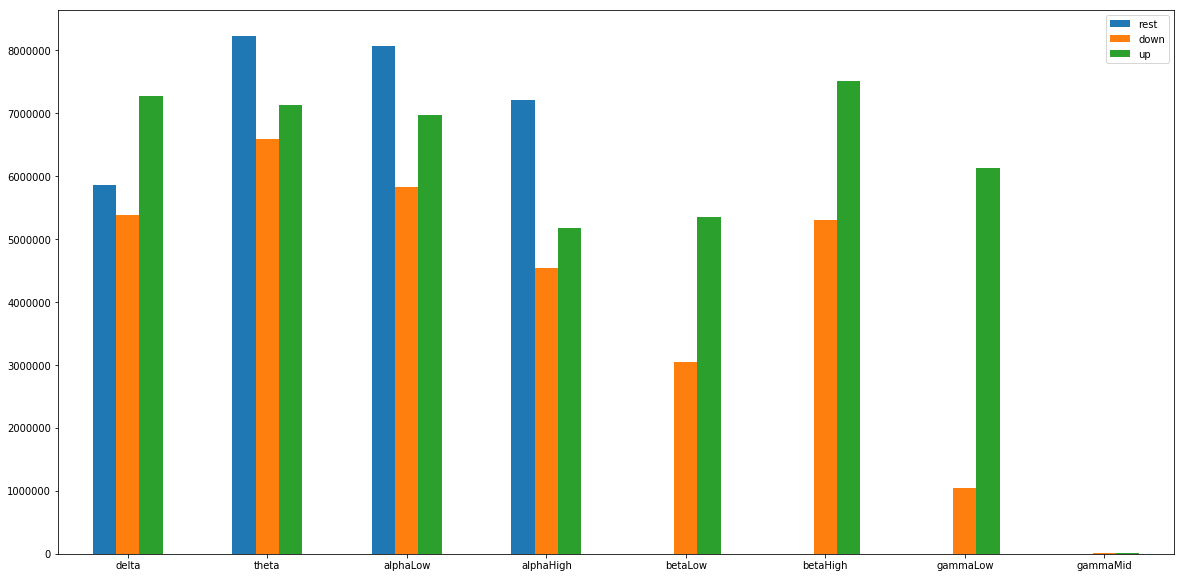

In [7]:
r = [rest.delta.std(), rest.theta.std(), rest.alphaLow.std(), 
     rest.alphaHigh.std(), rest.betaLow.std(), rest.betaHigh.std(), 
     rest.gammaLow.std(), rest.gammaMid.std()]

d = [ups.delta.std(), ups.theta.std(), ups.alphaLow.std(), 
     ups.alphaHigh.std(), ups.betaLow.std(), ups.betaHigh.std(), 
     ups.gammaLow.std(), ups.gammaMid.std()]

u = [downs.delta.std(), downs.theta.std(), downs.alphaLow.std(), 
     downs.alphaHigh.std(), downs.betaLow.std(), downs.betaHigh.std(), 
     downs.gammaLow.std(), downs.gammaMid.std()]

index = ['delta', 'theta', 'alphaLow',
          'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,
                    'down': d, 'up': u}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

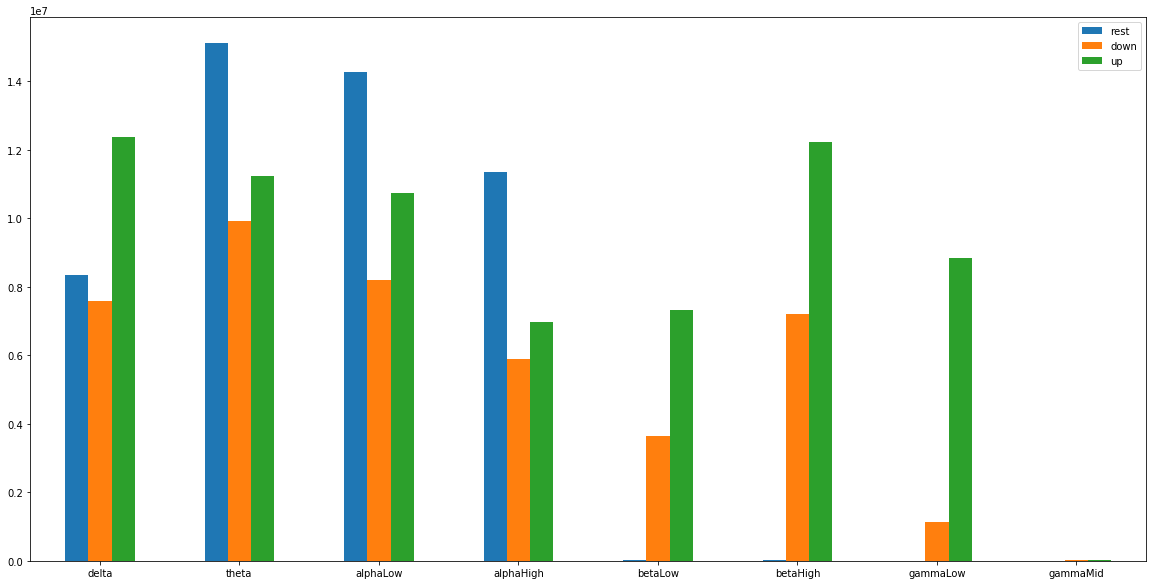

In [8]:
r = [rest.delta.std()+rest.delta.mean(), rest.theta.std()+rest.theta.mean(),
     rest.alphaLow.std()+rest.alphaLow.mean(), 
     rest.alphaHigh.std()+rest.alphaHigh.mean(), rest.betaLow.std()+rest.betaLow.mean(), 
     rest.betaHigh.std()+rest.betaHigh.mean(), 
     rest.gammaLow.std()+rest.gammaLow.mean(), rest.gammaMid.std()+rest.gammaMid.std()]

d = [ups.delta.std()+ups.delta.mean(), ups.theta.std()+ups.theta.mean(), 
     ups.alphaLow.std()+ups.alphaLow.mean(), 
     ups.alphaHigh.std()+ups.alphaHigh.mean(), ups.betaLow.std()+ups.betaLow.mean(), 
     ups.betaHigh.std()+ups.betaHigh.mean(), 
     ups.gammaLow.std()+ups.gammaLow.mean(), ups.gammaMid.std()+ups.gammaMid.mean()]

u = [downs.delta.std()+downs.delta.mean(), downs.theta.std()+downs.theta.mean(), 
     downs.alphaLow.std()+downs.alphaLow.mean(), 
     downs.alphaHigh.std()+downs.alphaHigh.mean(), downs.betaLow.std()+downs.betaLow.mean(), 
     downs.betaHigh.std()+downs.betaHigh.mean(), 
     downs.gammaLow.std()+downs.gammaLow.mean(), downs.gammaMid.std()+downs.gammaMid.mean()]

index = ['delta', 'theta', 'alphaLow',
          'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,
                    'down': d, 'up': u}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

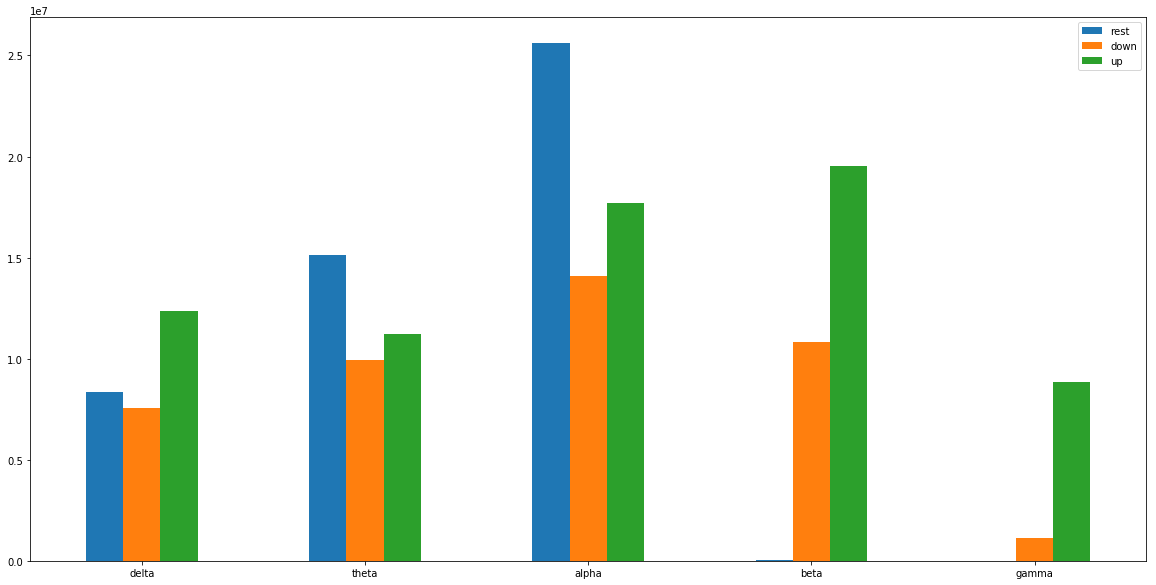

In [9]:
r = [rest.delta.std()+rest.delta.mean(), rest.theta.std()+rest.theta.mean(),
     (rest.alphaLow.std()+rest.alphaLow.mean()+ 
     rest.alphaHigh.std()+rest.alphaHigh.mean()), (rest.betaLow.std()+rest.betaLow.mean()+ 
     rest.betaHigh.std()+rest.betaHigh.mean()), 
     (rest.gammaLow.std()+rest.gammaLow.mean()+rest.gammaMid.std()+rest.gammaMid.std())]

d = [ups.delta.std()+ups.delta.mean(), ups.theta.std()+ups.theta.mean(), 
     (ups.alphaLow.std()+ups.alphaLow.mean()+ 
     ups.alphaHigh.std()+ups.alphaHigh.mean()), (ups.betaLow.std()+ups.betaLow.mean()+ 
     ups.betaHigh.std()+ups.betaHigh.mean()), 
     (ups.gammaLow.std()+ups.gammaLow.mean()+ups.gammaMid.std()+ups.gammaMid.mean())]

u = [downs.delta.std()+downs.delta.mean(), downs.theta.std()+downs.theta.mean(), 
     (downs.alphaLow.std()+downs.alphaLow.mean()+ 
     downs.alphaHigh.std()+downs.alphaHigh.mean()), (downs.betaLow.std()+downs.betaLow.mean()+ 
     downs.betaHigh.std()+downs.betaHigh.mean()), 
     (downs.gammaLow.std()+downs.gammaLow.mean()+downs.gammaMid.std()+downs.gammaMid.mean())]

index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

df = pd.DataFrame({'rest': r,
                    'down': d, 'up': u}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

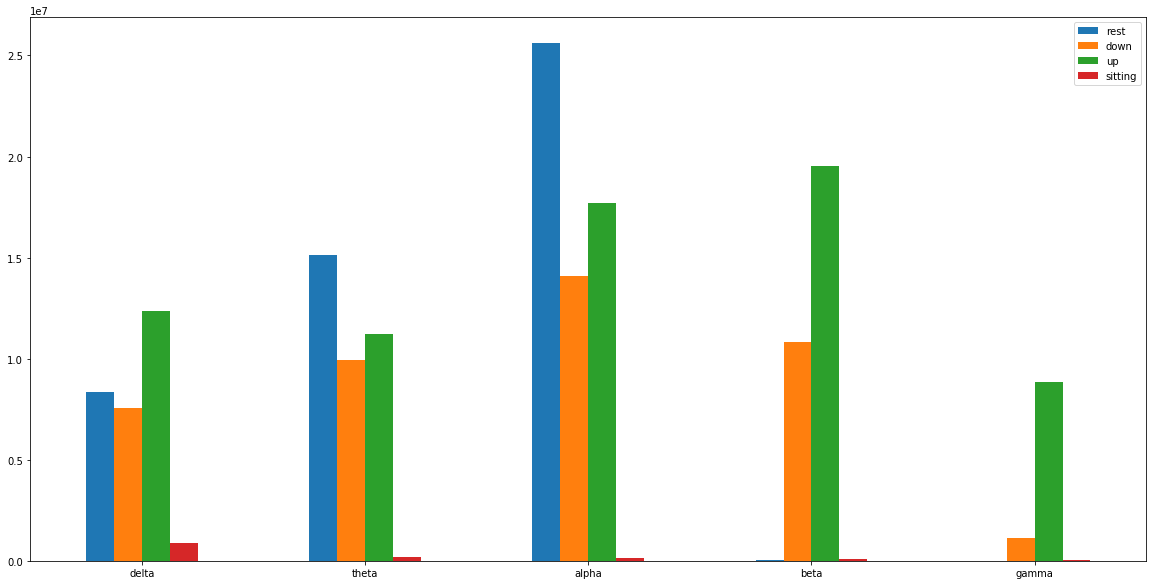

In [13]:
sitting = pd.read_csv("../data_collector/pikachu.csv")

sit = [sitting.delta.std()+sitting.delta.mean(), sitting.theta.std()+sitting.theta.mean(),
     (sitting.alphaLow.std()+sitting.alphaLow.mean()+ 
     sitting.alphaHigh.std()+sitting.alphaHigh.mean()), (sitting.betaLow.std()+sitting.betaLow.mean()+ 
     sitting.betaHigh.std()+sitting.betaHigh.mean()), 
     (sitting.gammaLow.std()+sitting.gammaLow.mean()+sitting.gammaMid.std()+sitting.gammaMid.std())]

index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

df = pd.DataFrame({'rest': r,'down': d, 'up': u, 'sitting': sit}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

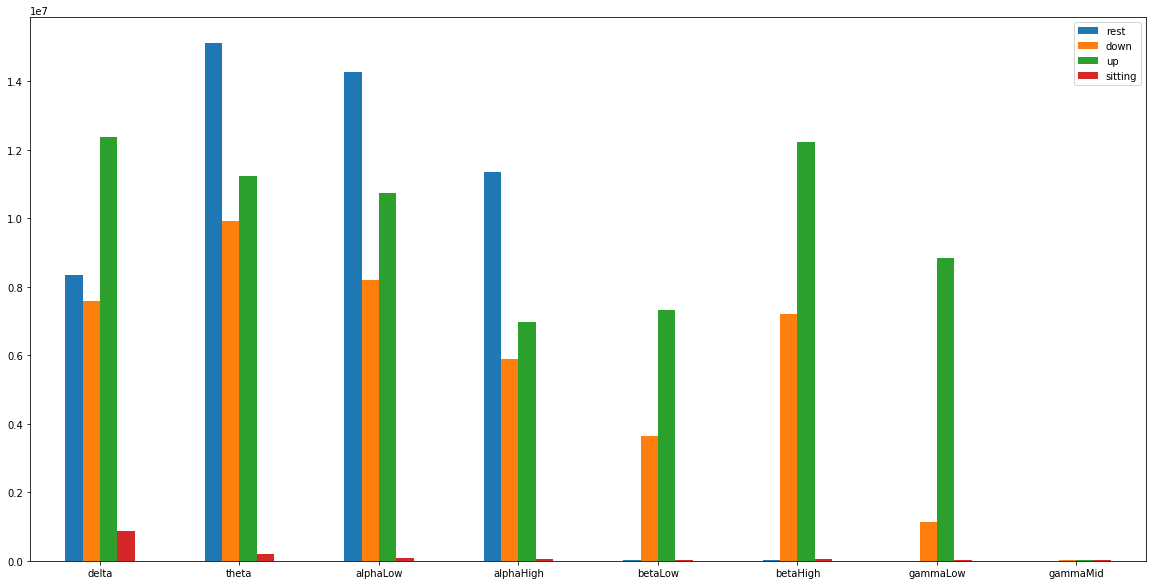

In [19]:

sit = [sitting.delta.std()+sitting.delta.mean(), sitting.theta.std()+sitting.theta.mean(),
     sitting.alphaLow.std()+sitting.alphaLow.mean(), 
     sitting.alphaHigh.std()+sitting.alphaHigh.mean(), sitting.betaLow.std()+sitting.betaLow.mean(), 
     sitting.betaHigh.std()+sitting.betaHigh.mean(), 
     sitting.gammaLow.std()+sitting.gammaLow.mean(), sitting.gammaMid.std()+sitting.gammaMid.std()]

r = [rest.delta.std()+rest.delta.mean(), rest.theta.std()+rest.theta.mean(),
     rest.alphaLow.std()+rest.alphaLow.mean(), 
     rest.alphaHigh.std()+rest.alphaHigh.mean(), rest.betaLow.std()+rest.betaLow.mean(), 
     rest.betaHigh.std()+rest.betaHigh.mean(), 
     rest.gammaLow.std()+rest.gammaLow.mean(), rest.gammaMid.std()+rest.gammaMid.std()]

d = [ups.delta.std()+ups.delta.mean(), ups.theta.std()+ups.theta.mean(), 
     ups.alphaLow.std()+ups.alphaLow.mean(), 
     ups.alphaHigh.std()+ups.alphaHigh.mean(), ups.betaLow.std()+ups.betaLow.mean(), 
     ups.betaHigh.std()+ups.betaHigh.mean(), 
     ups.gammaLow.std()+ups.gammaLow.mean(), ups.gammaMid.std()+ups.gammaMid.mean()]

u = [downs.delta.std()+downs.delta.mean(), downs.theta.std()+downs.theta.mean(), 
     downs.alphaLow.std()+downs.alphaLow.mean(), 
     downs.alphaHigh.std()+downs.alphaHigh.mean(), downs.betaLow.std()+downs.betaLow.mean(), 
     downs.betaHigh.std()+downs.betaHigh.mean(), 
     downs.gammaLow.std()+downs.gammaLow.mean(), downs.gammaMid.std()+downs.gammaMid.mean()]

index = ['delta', 'theta', 'alphaLow',
          'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,
                    'down': d, 'up': u, 'sitting': sit}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

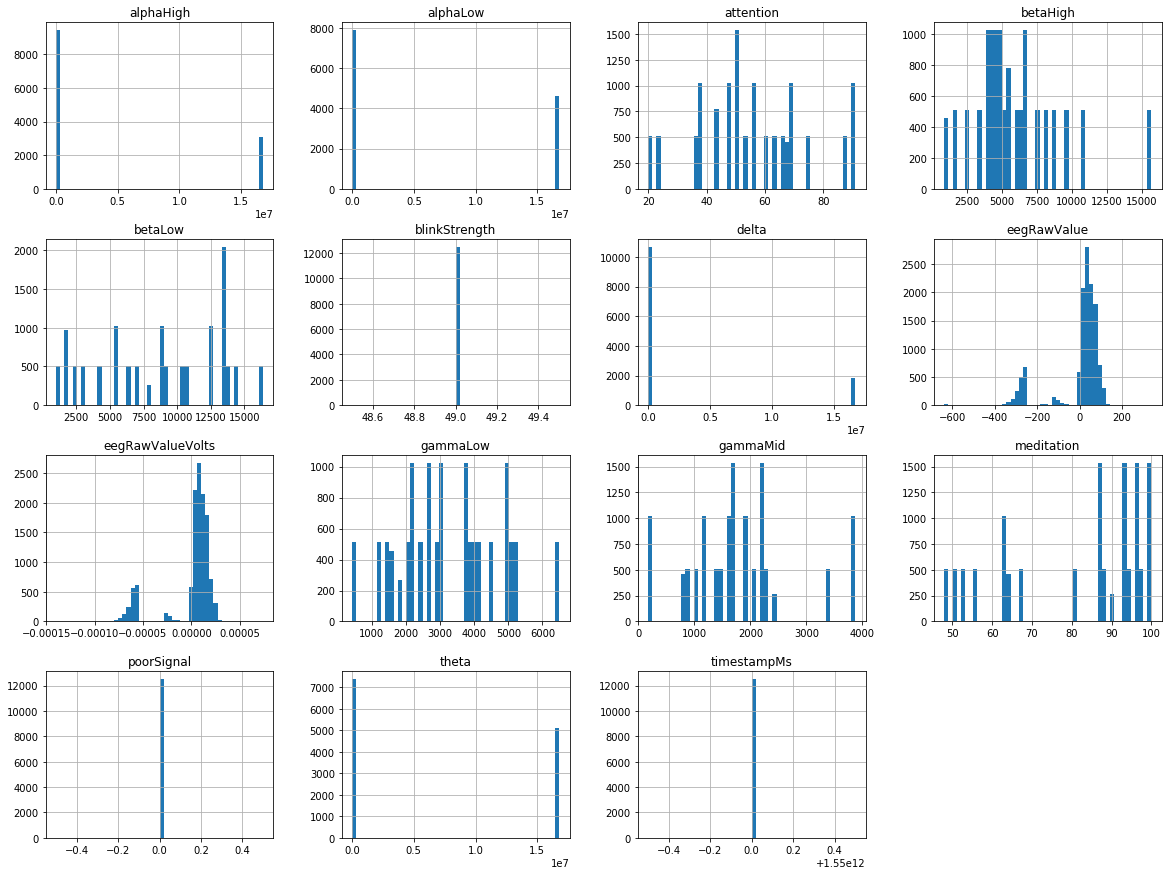

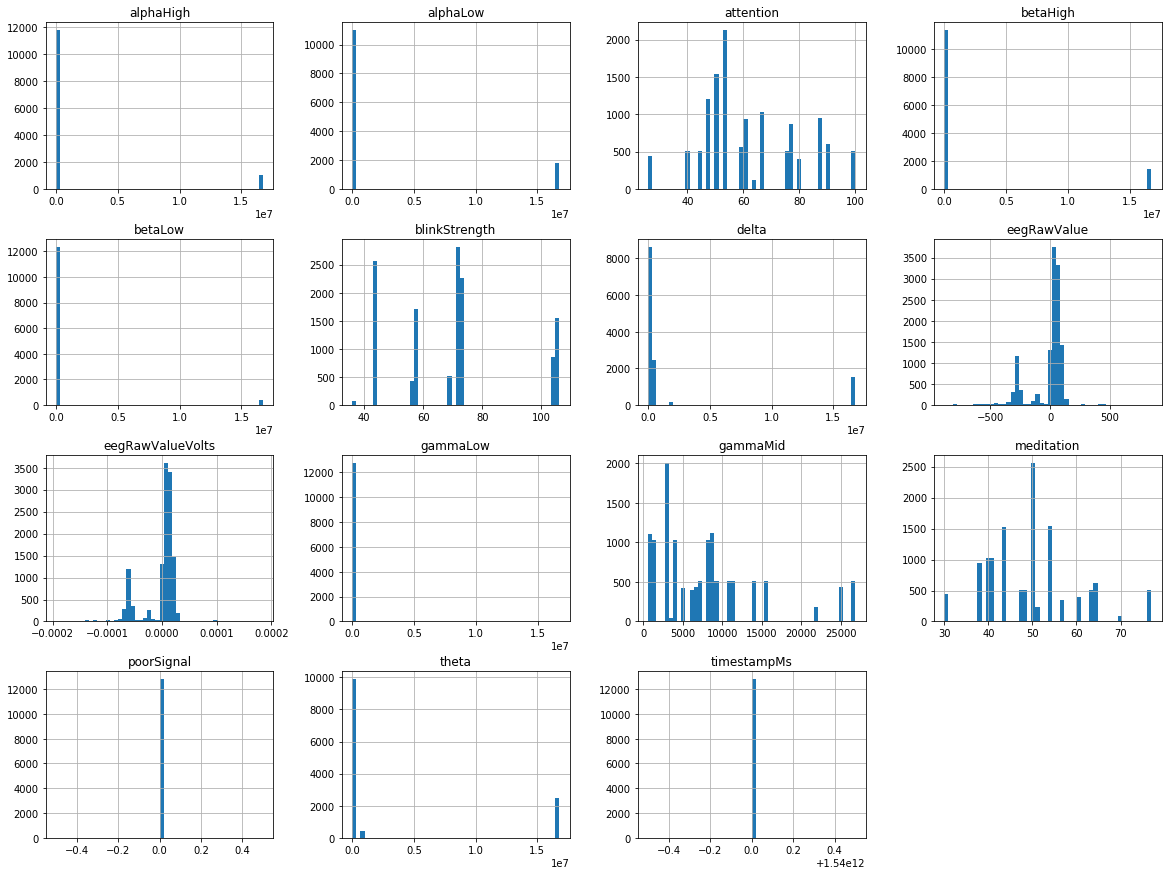

In [28]:
rest.hist(bins=50, figsize=(20,15)) 
plt.show()
ups.hist(bins=50, figsize=(20,15)) 
plt.show()

In [214]:
df.head()

,timestampMs,poorSignal,eegRawValue,eegRawValueVolts,attention,meditation,blinkStrength,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid,action
0,1.544360e+12,0,6,0.000001,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
1,1.544360e+12,0,-275,-0.000060,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
2,1.544360e+12,0,-289,-0.000063,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
3,1.544360e+12,0,6,0.000001,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
4,1.544360e+12,0,51,0.000011,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down


In [139]:
from sklearn.preprocessing import *

min_max = MinMaxScaler()

vectorizer = CountVectorizer()
df_min_max = min_max.fit_transform(df)


NameError: name 'CountVectorizer' is not defined

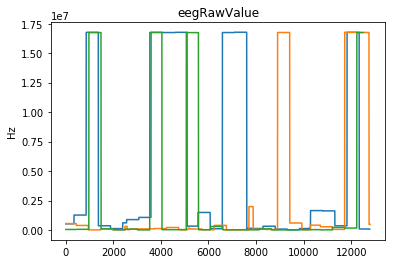

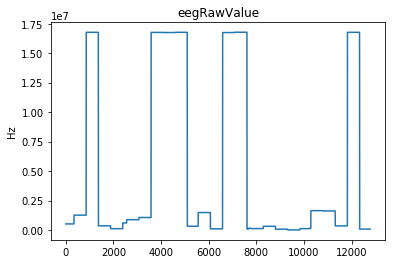

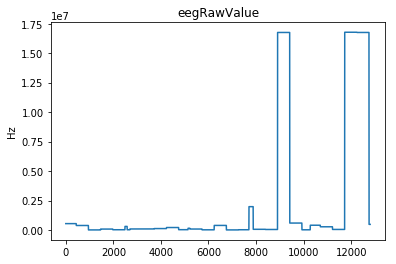

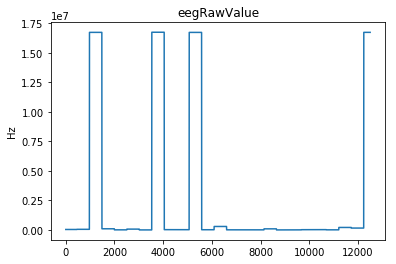

In [115]:
plt.plot(downs.delta.values)
plt.plot(ups.delta.values)
plt.plot(rest.delta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.delta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.delta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.delta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

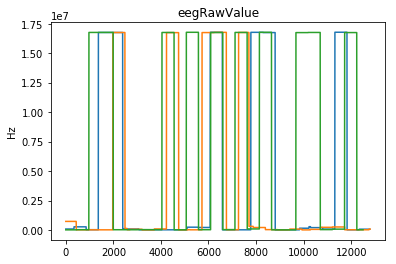

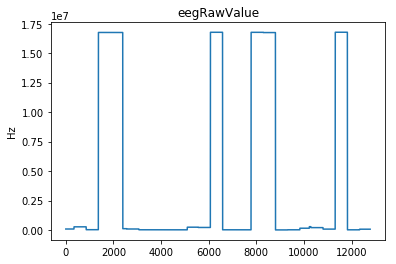

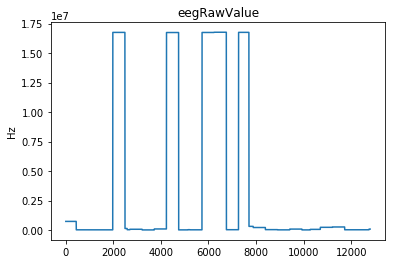

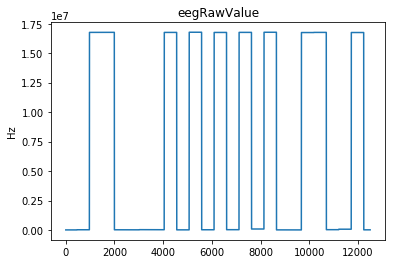

In [116]:
plt.plot(downs.theta.values)
plt.plot(ups.theta.values)
plt.plot(rest.theta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.theta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.theta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.theta.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

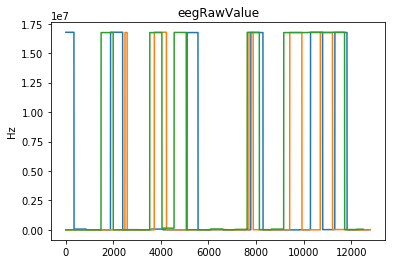

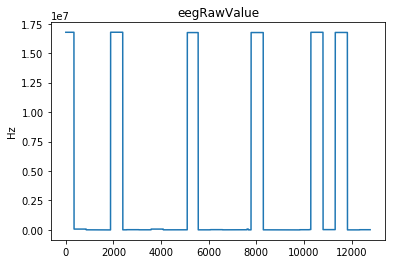

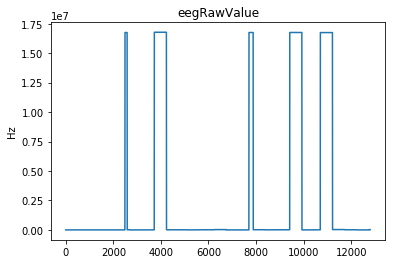

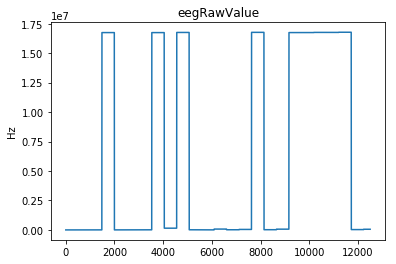

In [117]:
plt.plot(downs.alphaLow.values)
plt.plot(ups.alphaLow.values)
plt.plot(rest.alphaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.alphaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.alphaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.alphaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

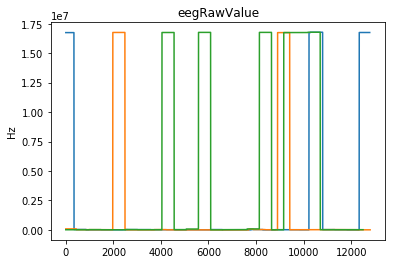

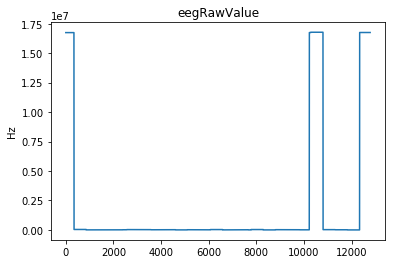

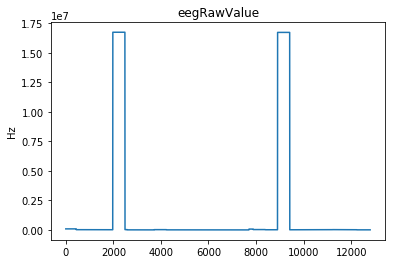

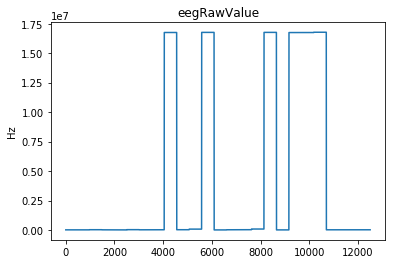

In [118]:
plt.plot(downs.alphaHigh.values)
plt.plot(ups.alphaHigh.values)
plt.plot(rest.alphaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.alphaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.alphaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.alphaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

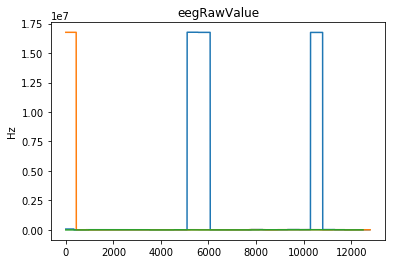

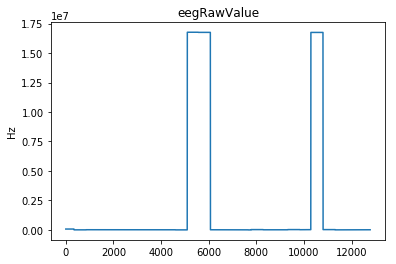

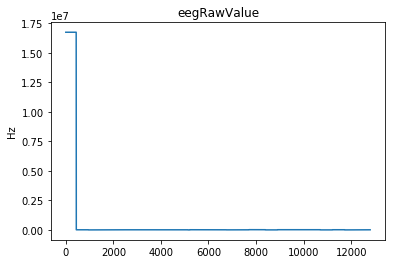

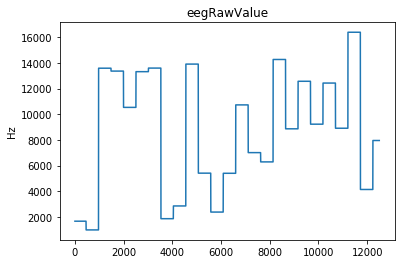

In [119]:
plt.plot(downs.betaLow.values)
plt.plot(ups.betaLow.values)
plt.plot(rest.betaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.betaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.betaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.betaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

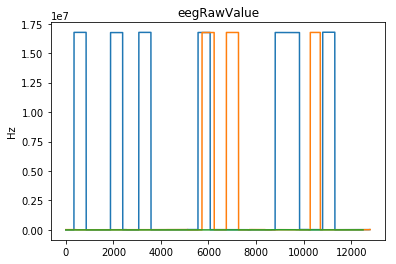

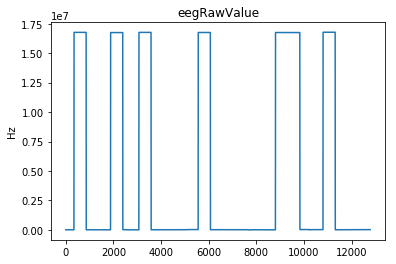

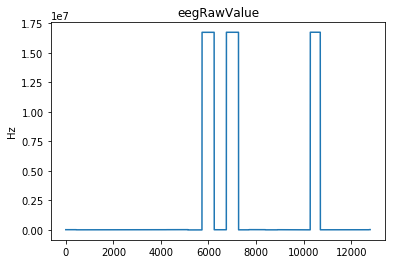

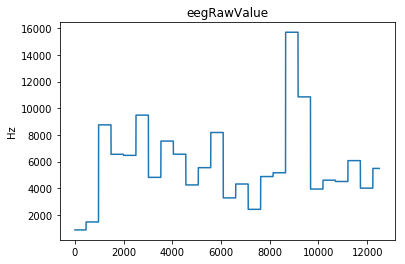

In [120]:
plt.plot(downs.betaHigh.values)
plt.plot(ups.betaHigh.values)
plt.plot(rest.betaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.betaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.betaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.betaHigh.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

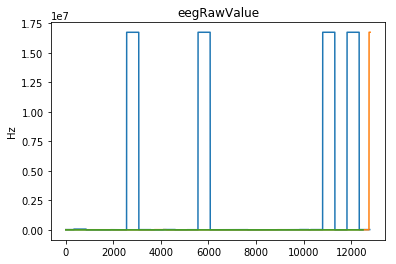

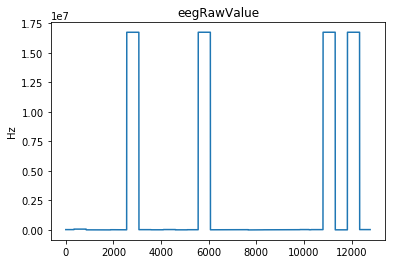

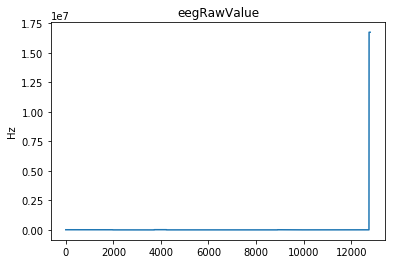

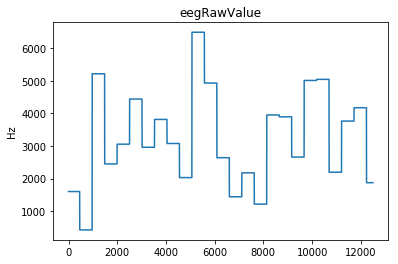

In [121]:
plt.plot(downs.gammaLow.values)
plt.plot(ups.gammaLow.values)
plt.plot(rest.gammaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.gammaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.gammaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.gammaLow.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

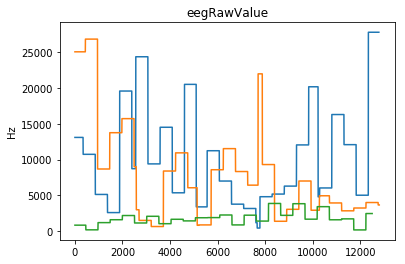

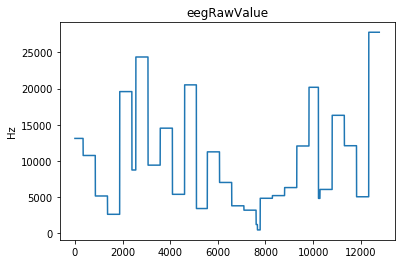

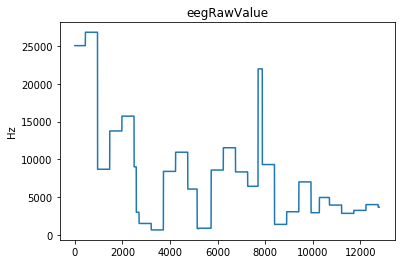

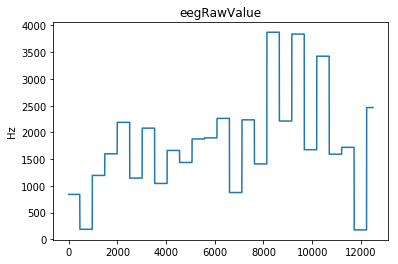

In [122]:
plt.plot(downs.gammaMid.values)
plt.plot(ups.gammaMid.values)
plt.plot(rest.gammaMid.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(downs.gammaMid.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(ups.gammaMid.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

plt.plot(rest.gammaMid.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

[]

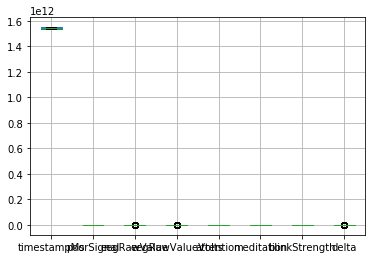

In [47]:
from pylab import rcParams

out = df.drop(['theta', 'alphaLow', 'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid'], axis=1)

out.boxplot(return_type='dict')
plt.plot()

In [48]:
delta_outliers = (df.delta > 16774835)

df[delta_outliers]

,timestampMs,poorSignal,eegRawValue,eegRawValueVolts,attention,meditation,blinkStrength,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid,action
1995,1.544360e+12,0,44.0,0.000010,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
1996,1.544360e+12,0,80.0,0.000018,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
1997,1.544360e+12,0,81.0,0.000018,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
1998,1.544360e+12,0,42.0,0.000009,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
1999,1.544360e+12,0,12.0,0.000003,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
2000,1.544360e+12,0,21.0,0.000005,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
2001,1.544360e+12,0,53.0,0.000012,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
2002,1.544360e+12,0,58.0,0.000013,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
2003,1.544360e+12,0,38.0,0.000008,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down
2004,1.544360e+12,0,10.0,0.000002,75,37,57,16774836,23573,15271,14053,9071,24799,12377,3170,down


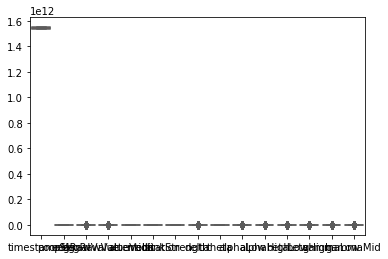

In [49]:
import seaborn as sb


out = df.drop(['theta', 'alphaLow', 'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid'], axis=1)

out = df

sb.boxplot(data=out, palette='hls')

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


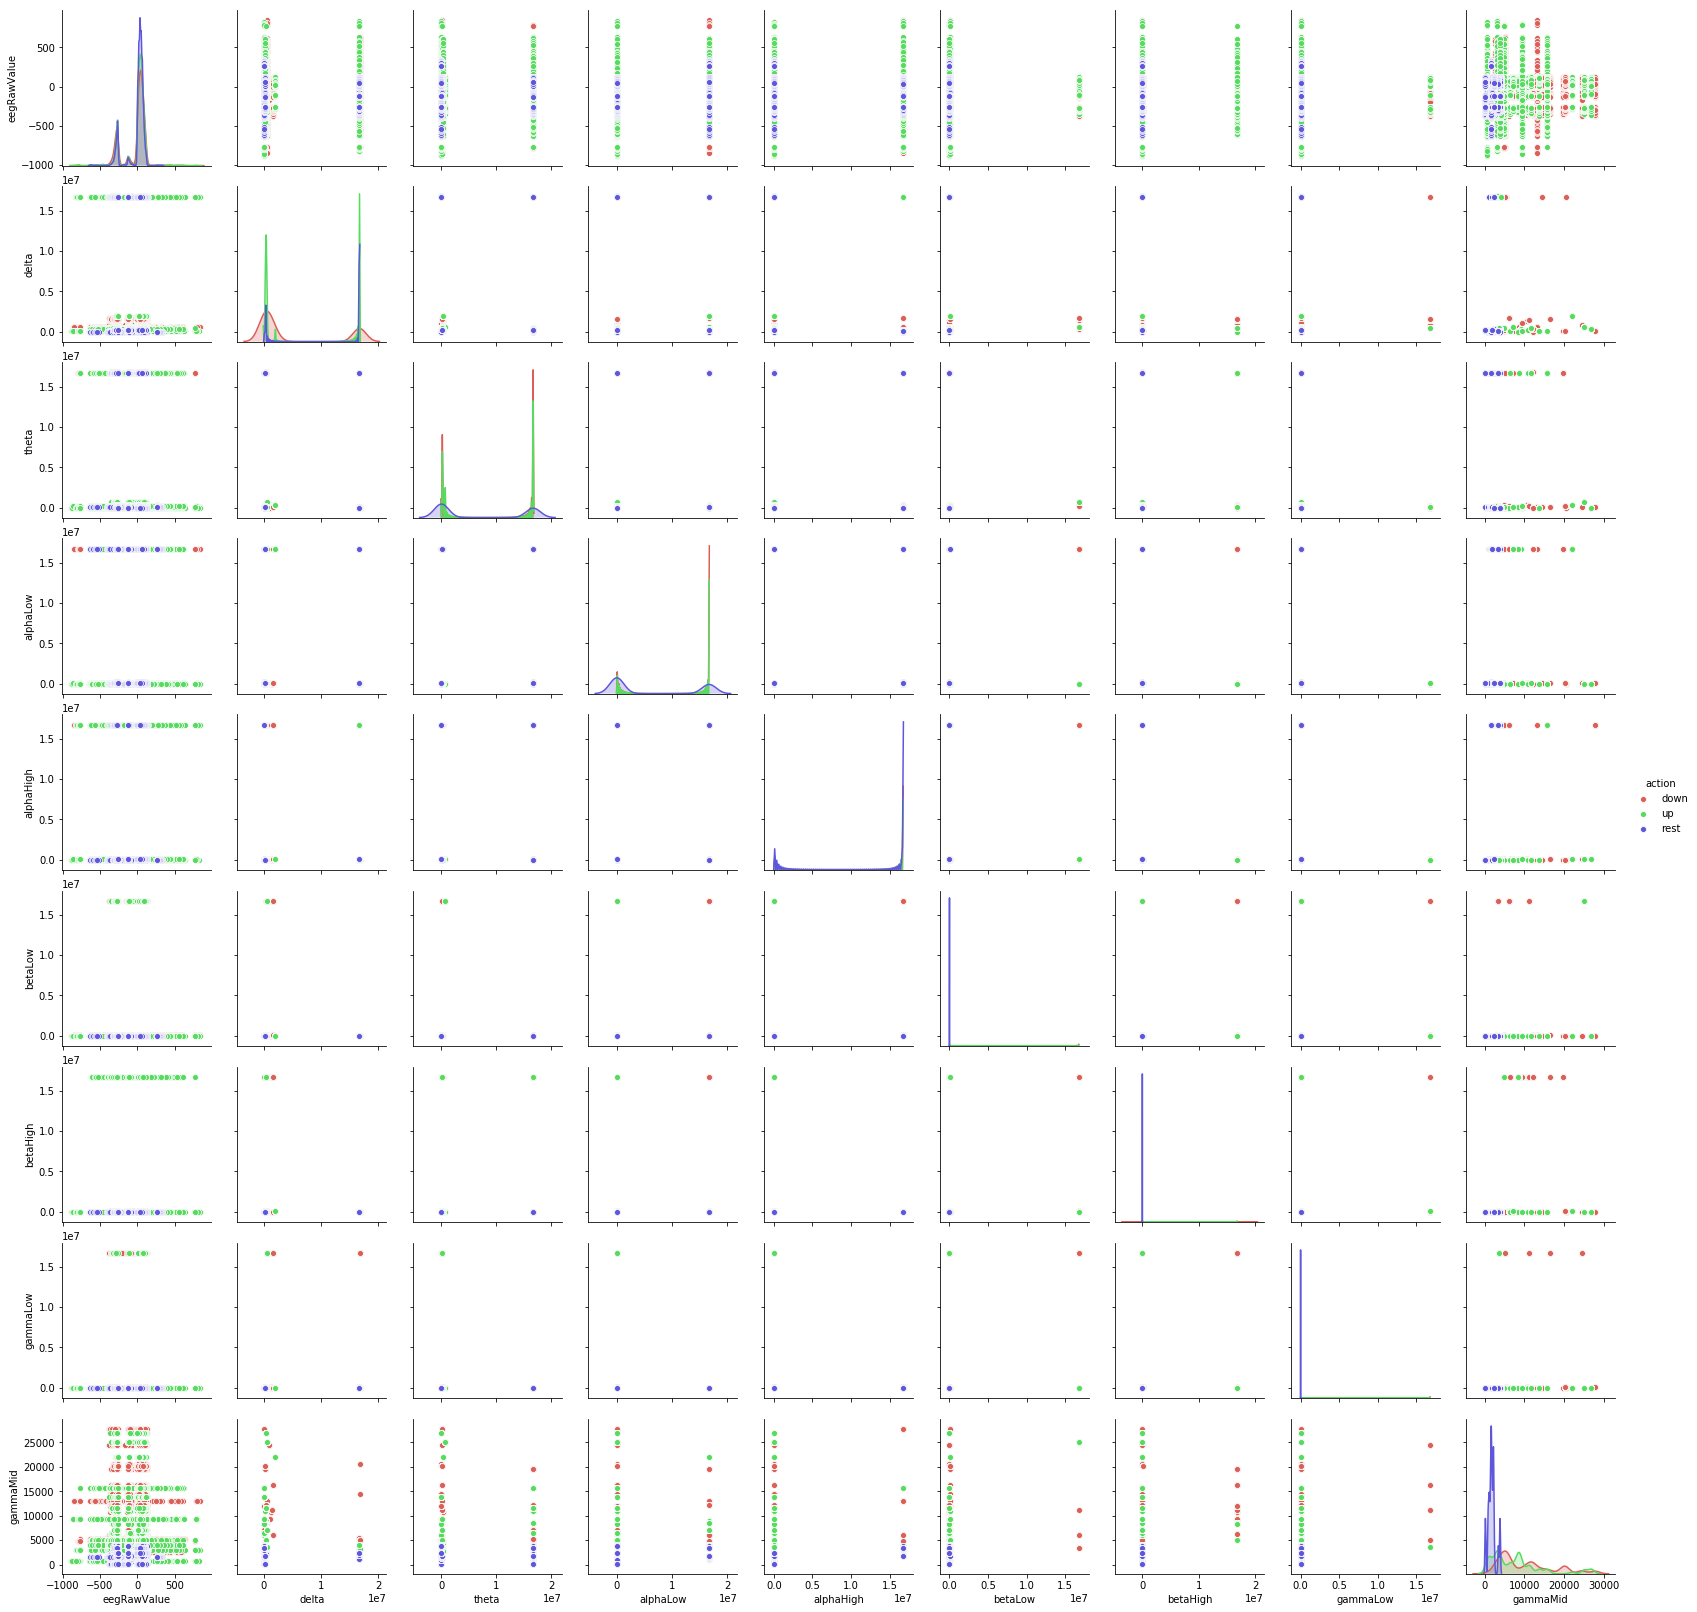

In [50]:
import seaborn as sb

out = df.drop(['timestampMs', 'poorSignal', 'meditation', 'attention', 'eegRawValueVolts', 'blinkStrength'], axis=1)

sb.pairplot(out, hue='action', palette='hls')

In [60]:
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

dbs = out.drop(['action'], axis=1)

dbs = clean_dataset(dbs)



model = DBSCAN(eps=0.8, min_samples=19).fit(dbs)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


In [61]:
outliers_df = pd.DataFrame(out)

print(Counter(model.labels_))

print(outliers_df[model.labels_==-1])

Counter({-1: 38076})
       eegRawValue     delta  theta  alphaLow  alphaHigh  betaLow  betaHigh  \
0              6.0    522632  82675  16772926   16745932    76060     13388   
1           -275.0    522632  82675  16772926   16745932    76060     13388   
2           -289.0    522632  82675  16772926   16745932    76060     13388   
3              6.0    522632  82675  16772926   16745932    76060     13388   
4             51.0    522632  82675  16772926   16745932    76060     13388   
5             73.0    522632  82675  16772926   16745932    76060     13388   
6             73.0    522632  82675  16772926   16745932    76060     13388   
7             58.0    522632  82675  16772926   16745932    76060     13388   
8             34.0    522632  82675  16772926   16745932    76060     13388   
9           -259.0    522632  82675  16772926   16745932    76060     13388   
10          -294.0    522632  82675  16772926   16745932    76060     13388   
11          -266.0    522632  8

Text(0.5, 1.0, 'DBSC')

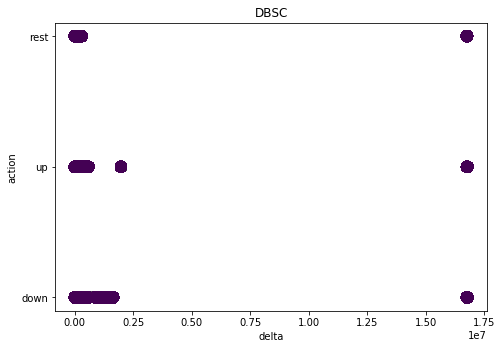

In [62]:
fig = plt.figure()


ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_


ax.scatter(dbs.delta, out.action, c=colors, s=120)
ax.set_xlabel('delta')
ax.set_ylabel('action')

plt.title('DBSC')


Text(0.5, 1.0, 'DBSC')

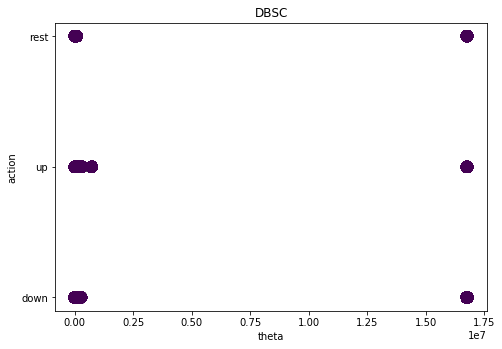

In [63]:
fig = plt.figure()


ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_
ax.scatter(dbs.theta, out.action, c=colors, s=120)
ax.set_xlabel('theta')
ax.set_ylabel('action')

plt.title('DBSC')

Text(0.5, 1.0, 'DBSC')

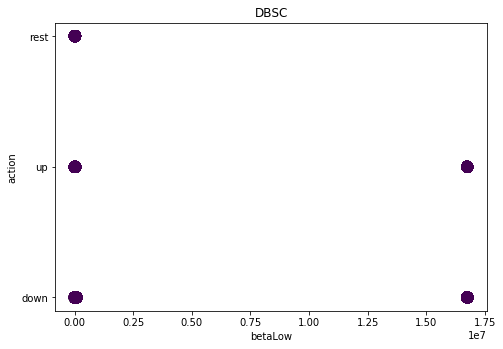

In [64]:
fig = plt.figure()


ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_
ax.scatter(dbs.betaLow, out.action, c=colors, s=120)
ax.set_xlabel('betaLow')
ax.set_ylabel('action')

plt.title('DBSC')

Text(0.5, 1.0, 'DBSC')

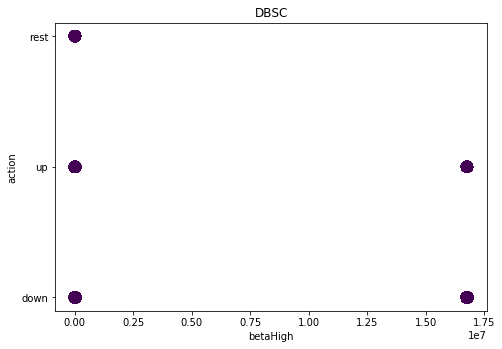

In [65]:
fig = plt.figure()


ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_
ax.scatter(dbs.betaHigh, out.action, c=colors, s=120)
ax.set_xlabel('betaHigh')
ax.set_ylabel('action')

plt.title('DBSC')

Text(0.5, 1.0, 'DBSC')

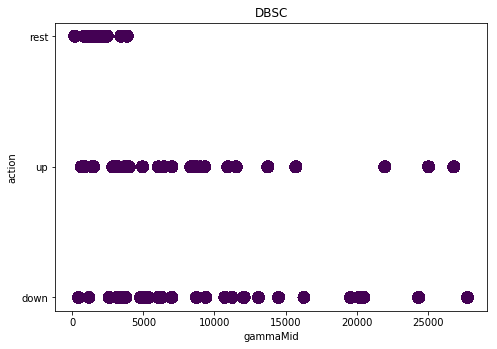

In [66]:
fig = plt.figure()


ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_
ax.scatter(dbs.gammaMid, out.action, c=colors, s=120)
ax.set_xlabel('gammaMid')
ax.set_ylabel('action')

plt.title('DBSC')

# K-Means Clustering

In [67]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
X = scale(dbs)


In [69]:
X

array([[ 0.12903979, -0.429014  , -0.62278996, ..., -0.39012428,
        -0.23716521,  0.94863099],
       [-1.80035302, -0.429014  , -0.62278996, ..., -0.39012428,
        -0.23716521,  0.94863099],
       [-1.89647935, -0.429014  , -0.62278996, ..., -0.39012428,
        -0.23716521,  0.94863099],
       ...,
       [ 0.53414361,  2.11945532, -0.63139432, ..., -0.391519  ,
        -0.24368205, -0.64100066],
       [ 0.49981278,  2.11945532, -0.63139432, ..., -0.391519  ,
        -0.24368205, -0.64100066],
       [ 0.36935562,  2.11945532, -0.63139432, ..., -0.391519  ,
        -0.24368205, -0.64100066]])

In [70]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

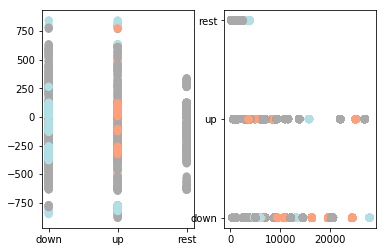

In [120]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=out.action, y=out.eegRawValue, c=color_theme[clustering.labels_], s=50)

plt.subplot(1,2,2)

plt.scatter(y=out.action, x=out.gammaMid, c=color_theme[clustering.labels_], s=50)

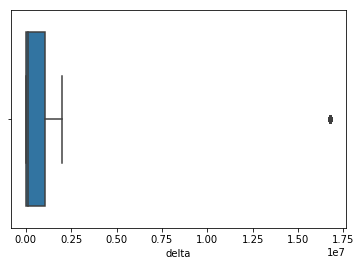

In [123]:
import seaborn as sns
sns.boxplot(x=dbs.delta)

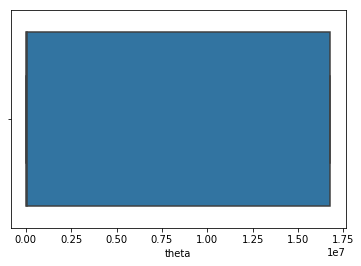

In [124]:
sns.boxplot(x=dbs.theta)

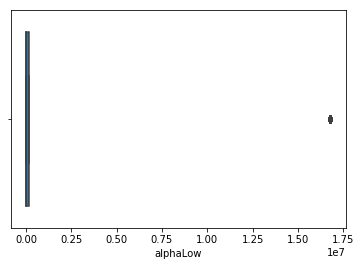

In [125]:
sns.boxplot(x=dbs.alphaLow)

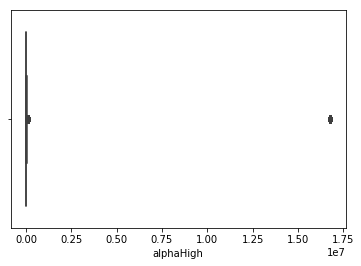

In [126]:
sns.boxplot(x=dbs.alphaHigh)

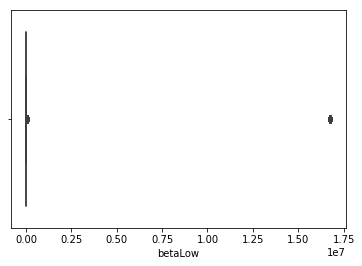

In [127]:
sns.boxplot(x=dbs.betaLow)

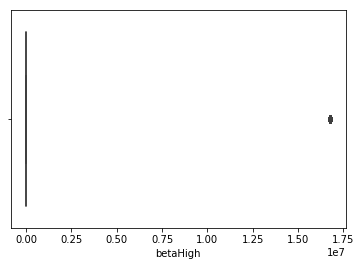

In [128]:
sns.boxplot(x=dbs.betaHigh)

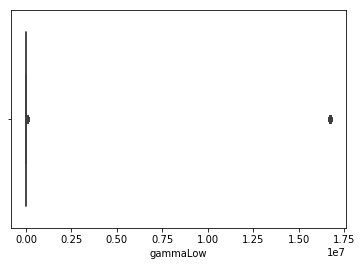

In [129]:
sns.boxplot(x=dbs.gammaLow)

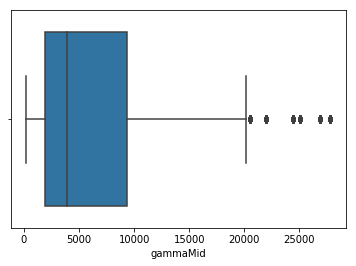

In [130]:
sns.boxplot(x=dbs.gammaMid)

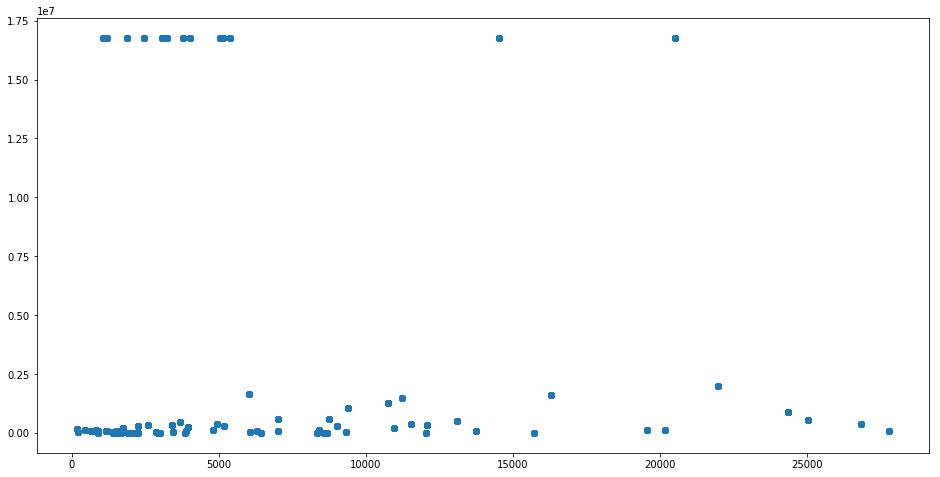

In [132]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dbs.gammaMid, dbs.delta)
plt.show()

In [137]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dbs))
print(z)
threshold = 3
print(np.where(z > 3))

[[0.12903979 0.429014   0.62278996 ... 0.39012428 0.23716521 0.94863099]
 [1.80035302 0.429014   0.62278996 ... 0.39012428 0.23716521 0.94863099]
 [1.89647935 0.429014   0.62278996 ... 0.39012428 0.23716521 0.94863099]
 ...
 [0.53414361 2.11945532 0.63139432 ... 0.391519   0.24368205 0.64100066]
 [0.49981278 2.11945532 0.63139432 ... 0.391519   0.24368205 0.64100066]
 [0.36935562 2.11945532 0.63139432 ... 0.391519   0.24368205 0.64100066]]
(array([  155,   158,   159, ..., 36661, 36662, 36663]), array([0, 0, 0, ..., 0, 0, 0]))


In [138]:
print(z[155][0])

3.6857140684132466


In [139]:
Q1 = dbs.quantile(0.25)
Q3 = dbs.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

timestampMs         1.000000e+10
poorSignal          0.000000e+00
eegRawValue         5.900000e+01
eegRawValueVolts    1.298000e-05
attention           2.500000e+01
meditation          2.300000e+01
blinkStrength       2.300000e+01
delta               1.037866e+06
theta               1.673099e+07
alphaLow            1.428800e+05
alphaHigh           1.929400e+04
betaLow             1.062700e+04
betaHigh            1.752600e+04
gammaLow            1.160300e+04
gammaMid            7.431000e+03
dtype: float64


In [141]:
print(dbs < (Q1 - 1.5 * IQR)) |(dbs > (Q3 + 1.5 * IQR))

       alphaHigh  alphaLow  attention  betaHigh  betaLow  blinkStrength  \
0          False     False      False     False    False          False   
1          False     False      False     False    False          False   
2          False     False      False     False    False          False   
3          False     False      False     False    False          False   
4          False     False      False     False    False          False   
5          False     False      False     False    False          False   
6          False     False      False     False    False          False   
7          False     False      False     False    False          False   
8          False     False      False     False    False          False   
9          False     False      False     False    False          False   
10         False     False      False     False    False          False   
11         False     False      False     False    False          False   
12         False     Fals

TypeError: Could not compare [None] with block values

In [143]:
df_o = z[(z < 3).all(axis=1)]

In [144]:
dbs.shape

(38076, 9)

In [145]:
df_o.shape

(33122, 9)

In [147]:
df_o.data.